In [162]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [163]:
data=datasets.load_iris()

In [164]:

X, y = data.data, data.target

In [165]:
cols=data.feature_names
cols

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [182]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [166]:
df=pd.DataFrame(X,columns=cols)

In [167]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [168]:
df=df.drop(columns=["petal length (cm)"])

In [169]:
X=df.loc[:, df.columns != "label"]

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.5)

In [172]:
classifier=tree.DecisionTreeClassifier()

In [173]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [174]:
predictions=classifier.predict(X_test)

In [175]:
final=pd.DataFrame(list(y_test),columns=["test"])

In [176]:
final["pred"]=predictions

In [177]:
final.head()

,test,pred
0,2,1
1,1,2
2,2,2
3,0,0
4,2,2


In [179]:
cm = confusion_matrix(y_test, predictions)

In [180]:
cm

array([[28,  0,  0],
       [ 0, 19,  2],
       [ 0,  4, 22]])

In [185]:
cm_df = pd.DataFrame(cm,\
                     index = ['Setosa','Versicolour',"Virginica"],columns = ['Setosa','Versicolour',"Virginica"])

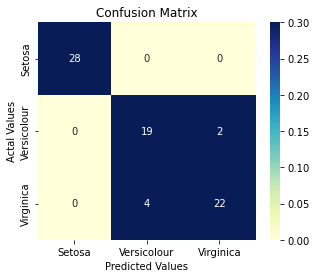

In [186]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, vmax=.3, square=True,  cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()